# Trabalho 1 - Unidade 1
- **Nome:** Bledson Kivy
- **Matrícula:** 2016045160

# Base de dados
Será utilizada a base de dados referente ao desempenho dos alunos do Instituto Metrópole Digital em componentes curriculares do núcleo comum do curso de Bacharelado em Tecnologia da Informação.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

arquivo = 'imd_notas.xlsx'
excel = pd.ExcelFile(arquivo)
dados = excel.parse(0)

blue = (0 / 255, 105 / 255, 164 / 255)
orange = (200 / 255, 82 / 255, 0 / 255)

### Questão 1
Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação?
- Por disciplina?
- Geral (considerando as 7 disciplinas)?

In [2]:
# Por disciplina
# Rationale: Para cada disciplina pego todos
# os ids dos alunos que passaram nela. Entao
# pego todos os ids dos alunos que foram
# aprovados mas tambem reprovaram.
# Somo ambos, conto as repeticoes e
# faco a media.

disciplinas = dados['disciplina_ID'].unique()

dados_disciplinas = []
media = []

for i in disciplinas:
    dados_disciplinas.append(dados[dados['disciplina_ID'] == i])
    id_aprovados = pd.Series(
        dados_disciplinas[i]['a_ID'][
            dados_disciplinas[i]['status.disciplina'] == 'Aprovado'].unique())
    reprovacoes = dados_disciplinas[i]['a_ID'][
        dados_disciplinas[i]['a_ID'].isin(id_aprovados)][
        dados_disciplinas[i]['status.disciplina'] == 'Reprovado']
    media.append(reprovacoes.append(id_aprovados).value_counts().mean())

print(media)

[1.2713864306784661, 1.027027027027027, 1.1242362525458249, 1.3333333333333333, 1.0313111545988258, 1.359073359073359, 1.0899280575539569]


In [3]:
# Geral
# Rationale: Faco a media da lista
# contendo as medias das disciplinas.

print(np.mean(media))

1.17661365926


### Questão 2
Quais regiões têm os maiores índices de aprovação nos componentes curriculares?

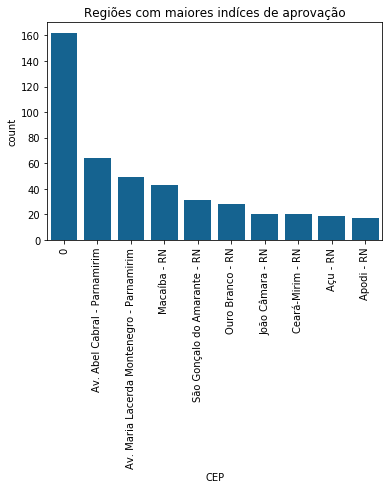

In [4]:
# Rationale: Pego os CEPs onde o status da
# disciplina esta como Aprovado. Entao
# apresento os 10 CEPs com maior numero.

cep_alunos_aprovados = dados['CEP'][dados['status.disciplina'] == 'Aprovado']
labels = ['0',
          'Av. Abel Cabral - Parnamirim',
          'Av. Maria Lacerda Montenegro - Parnamirim',
          'Macaíba - RN',
          'São Gonçalo do Amarante - RN',
          'Ouro Branco - RN',
          'João Câmara - RN',
          'Ceará-Mirim - RN',
          'Açu - RN',
          'Apodi - RN']

ax = sns.countplot(cep_alunos_aprovados,
                   color=blue,
                   order=cep_alunos_aprovados.value_counts()[:10].index)
ax.set_xticklabels(labels, rotation=90)

plt.title('Regiões com maiores indíces de aprovação')

plt.show()

### Questão 3
Como estão caracterizadas as estatísticas das notas dos diversos componentes curriculares que compõem o _dataset_?
- Período (ano)?
- Geral?

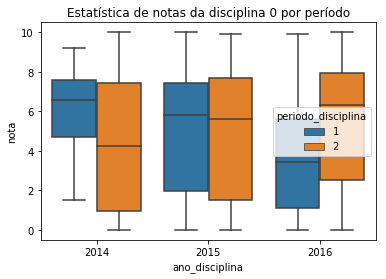

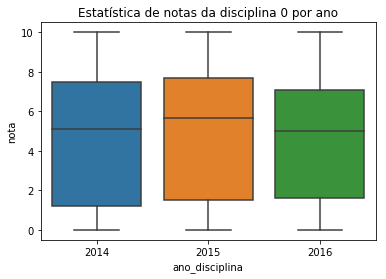

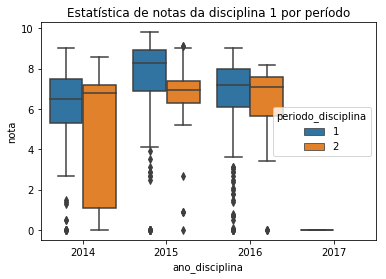

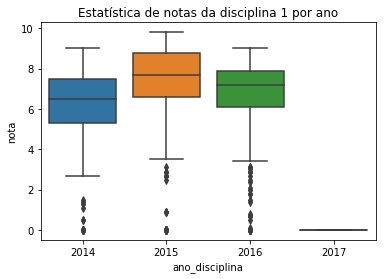

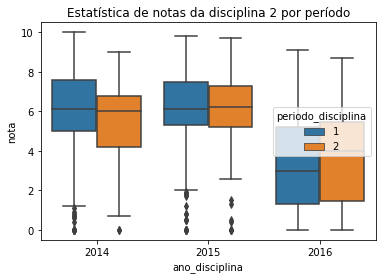

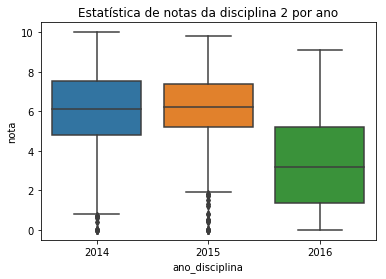

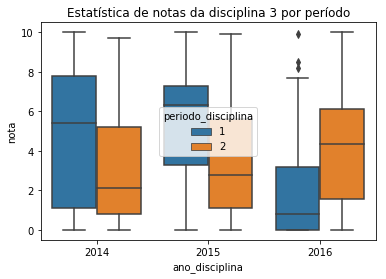

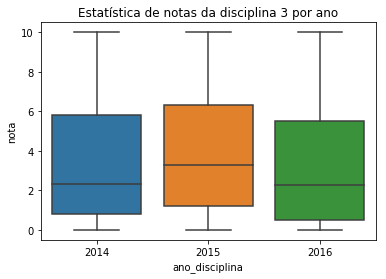

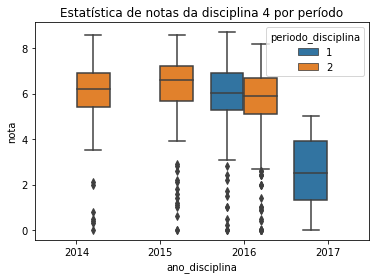

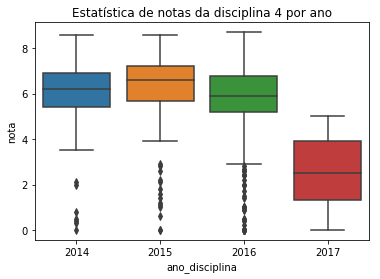

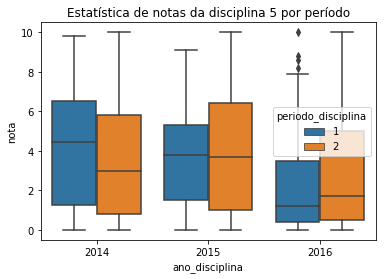

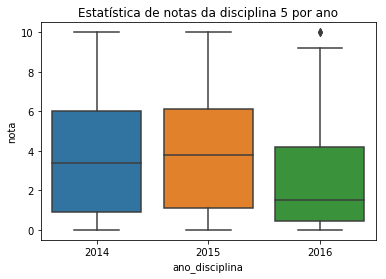

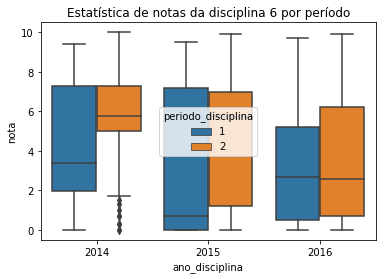

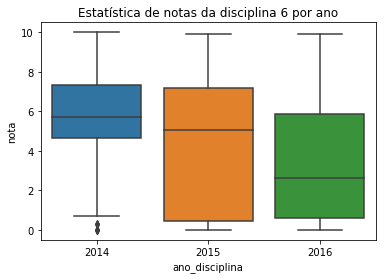

In [5]:
# Por período e ano
# Rationale: Para cada disciplina, gero um
# grafico de caixa para as notas de cada
# periodo em cada ano. Em seguida, gero um
# grafico apenas por ano.

for i, disciplina in zip(disciplinas, dados_disciplinas):
    sns.boxplot(data=disciplina,
                x='ano_disciplina',
                y='nota',
                hue='periodo_disciplina')
    plt.title('Estatística de notas da disciplina ' + str(i) + ' por período')
    plt.show()

    sns.boxplot(data=disciplina, x='ano_disciplina', y='nota')
    plt.title('Estatística de notas da disciplina ' + str(i) + ' por ano')
    plt.show()

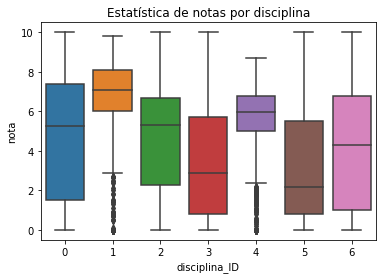

In [6]:
# Geral
# Rationale: Gero um grafico de caixa
# contendo a estatistica geral de notas para
# cada disciplina

sns.boxplot(data=dados, x='disciplina_ID', y='nota', orient='v')
plt.title('Estatística de notas por disciplina')
plt.show()

 ### Questão 4
 Existe correlação entre as notas dos diferentes componentes curriculares?

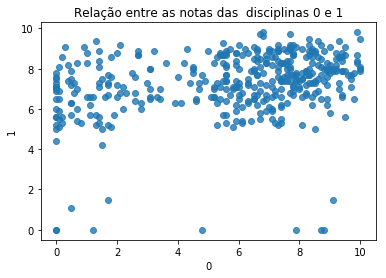

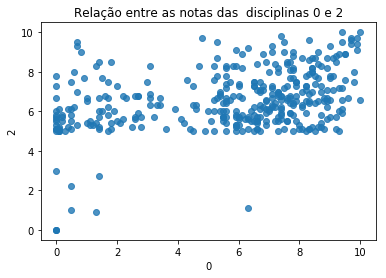

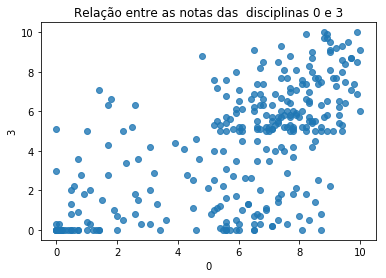

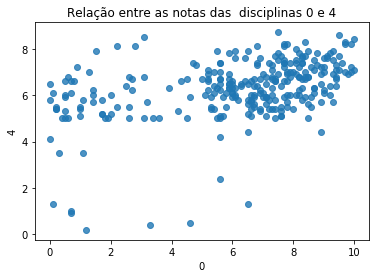

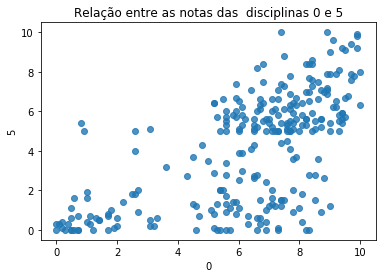

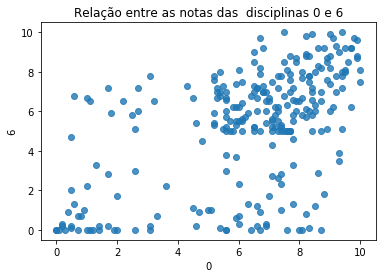

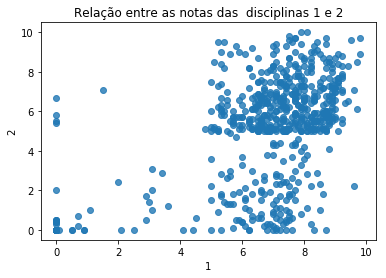

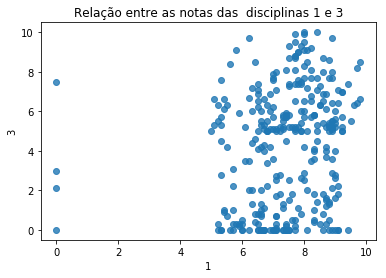

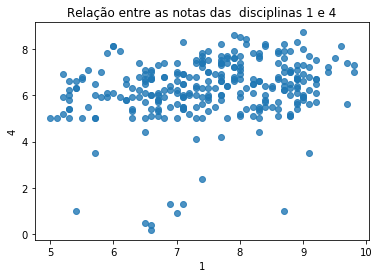

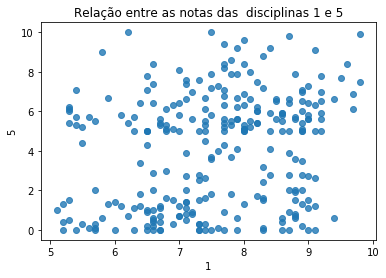

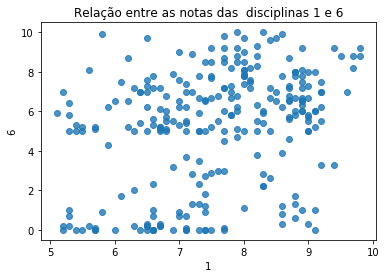

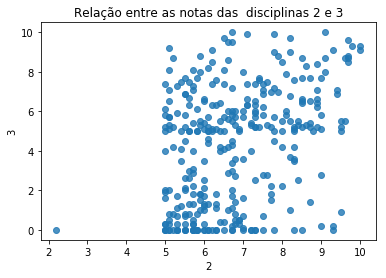

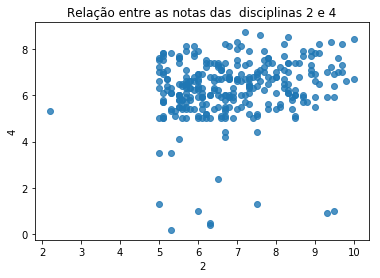

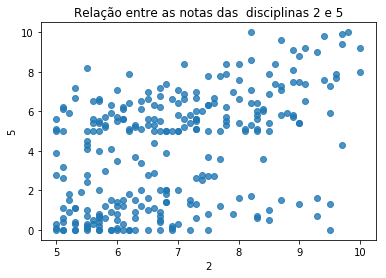

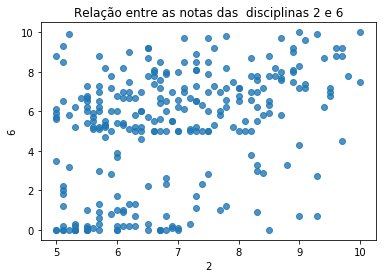

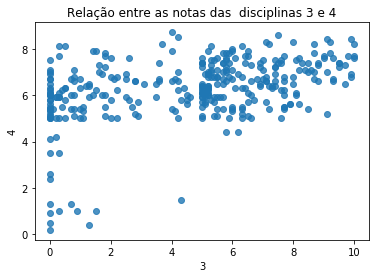

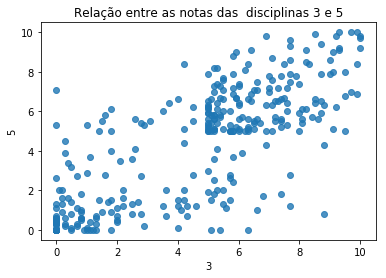

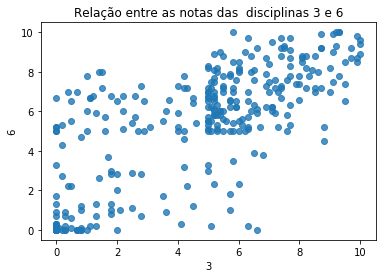

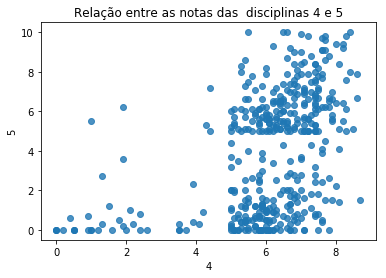

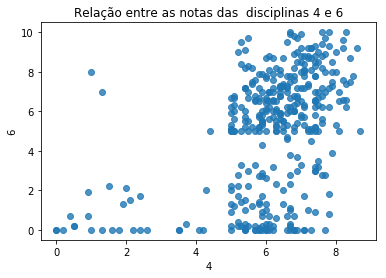

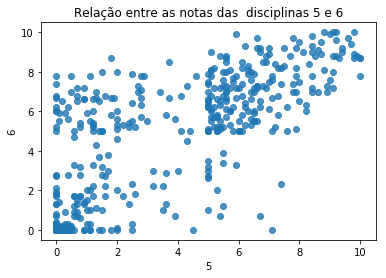

In [7]:
# Rationale: Comparo as notas dos alunos
# comuns a cada par de disciplinas, e gero
# um grafico de dispersao.

for i in range(disciplinas.size-1):
    d1 = dados_disciplinas[i]
    for j in range(i+1, disciplinas.size):
        d2 = dados_disciplinas[j]
        d1 = d1[
            d1['a_ID'].isin(d2['a_ID'])].drop_duplicates(
            'a_ID', keep='last').sort_values(by='a_ID')
        d2 = d2[
            d2['a_ID'].isin(d1['a_ID'])].drop_duplicates(
            'a_ID', keep='last').sort_values(by='a_ID')
        df = pd.DataFrame({
            str(i): d1['nota'].values, str(j): d2['nota'].values})

        ax = sns.regplot(data=df, x=str(i), y=str(j), fit_reg=False)
        plt.title('Relação entre as notas das  disciplinas '
                  + str(i) + ' e ' + str(j))
        plt.show()

### Questão 5
Existe correlação entre o número médio de disciplinas cursadas por aluno no semestre e o seu desempenho?

In [8]:
# escolher métrica (nota, aprovações...)

### Questão 6
Existe correlação entre a nota do Exame Nacional do Ensino Médio (ENEM) e o status do aluno?

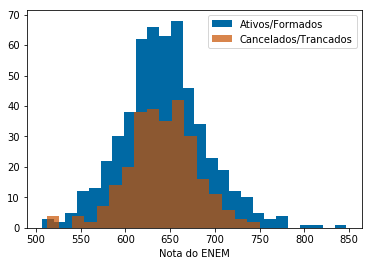

In [9]:
# Rationale: Pego alunos com nota do ENEM,
# então separo em dois grupos: grupo 1, onde
# consta alunos com status Ativo, Concluido,
# Formando ou Formado; grupo 2, com alunos
# com status Cancelado, Trancado. Finalmente
# gero um grafico de dispersao com ambos
# os grupos.

alunos_enem = dados.drop_duplicates('a_ID').dropna()
status_grupo1 = alunos_enem['enen-nota'][alunos_enem['status'].isin([
    'ATIVO', 'CONCLUIDO', 'FORMANDO', 'FORMADO'])]
status_grupo2 = alunos_enem['enen-nota'][alunos_enem['status'].isin([
    'CANCELADO', 'TRANCADO'])]
sns.distplot(
    status_grupo1,
    kde=False,
    color=blue,
    hist_kws={'alpha': 1},
    label='Ativos/Formados')
sns.distplot(
    status_grupo2,
    kde=False,
    color=orange,
    hist_kws={'alpha': 0.7},
    label='Cancelados/Trancados',
    axlabel='Nota do ENEM')
plt.legend()
plt.show()

### Questão 7
Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEM?

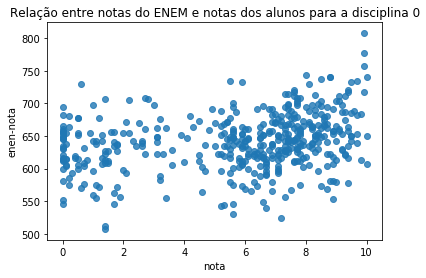

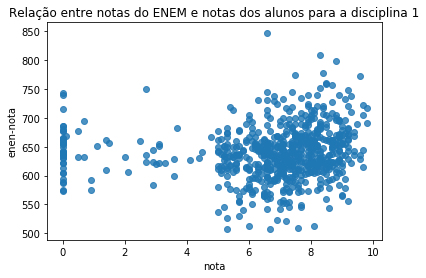

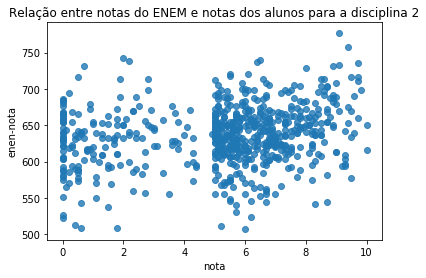

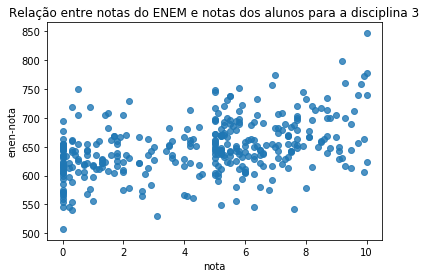

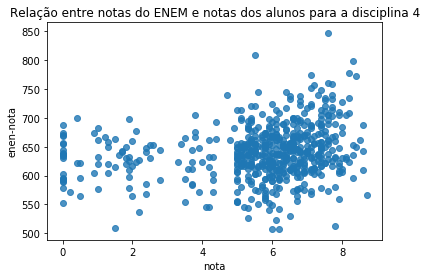

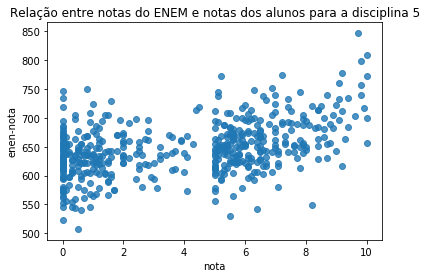

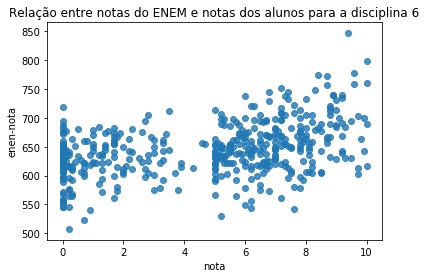

In [10]:
# Rationale: Pego todos os alunos com nota
# do ENEM. Para cada disciplina pego o id
# dos alunos aprovados na disciplina,
# supondo que a ultima repeticao do id e uma
# aprovacao. Entao gero um grafico de
# dispersao comparando ambas as notas. 

alunos_enem = dados.dropna()
for i in disciplinas:
    disciplina = alunos_enem[
        alunos_enem['disciplina_ID'] == i].drop_duplicates('a_ID', keep='last')
    ax = sns.regplot(x='nota', y='enen-nota', data=disciplina, fit_reg=False)
    plt.title('Relação entre notas do ENEM e notas dos alunos para '
              + 'a disciplina ' + str(i))
    plt.show()